In [12]:
import re

def extract_string_between_quotes(string):
    pattern = r'"([^"]*)"'
    match = re.search(pattern, string)
    if match:
        return match.group(1)
    else:
        return None

def extract_key(string):
    li = string.strip().split()
    if len(li)>1:
        x=li[1].replace("(","")
        x=x.replace(")","")
        return x
    return string.strip().split()[0]
    
def extract_largest_number(string):
    numbers = re.findall(r'-?\d+(?:\.\d+)?', string)
    if numbers:
        largest_number = max(map(float, numbers))
        return largest_number
    else:
        return None
    
class Pin:
    def __init__(self,pg,rv,fv,pin=" "):
        self.pin=pin
        self.pg=pg
        self.rv=rv
        self.fv=fv
cell = {}

def process_file(filename):
    powerdict = {}
    with open(filename, "r") as f:
        with open("cellmap.txt", "w") as w:
            line = f.readline()
            while line:
                if line.find("cell (") >= 0 or line.find("internal_power") >= 0 or line.find(
                        "related_pin") >= 0 or line.find("related_pg_pin") >= 0:
                    w.writelines(line)
                else:
                    if line.find("rise_power (") >= 0:
                        maxnum = -1000
                        while line.find("}") < 0:
                            if line.find("\\") >= 0 and line.find("values") < 0:
                                maxnum = extract_largest_number(line)
                            line = f.readline()
                        w.writelines("max risevalue: " + str(maxnum) + "\n")
                    elif line.find("fall_power (") >= 0:
                        while line.find("}") < 0:
                            if line.find("\\") >= 0 and line.find("values") < 0:
                                maxnum = extract_largest_number(line)
                            line = f.readline()
                        w.writelines("max fallvalue: " + str(maxnum) + "\n}\n")
                line = f.readline()
        w.close()
    li = []
    with open("cellmap.txt", "r") as f:
        with open("cellmap2.txt", "w") as w:
            line = " "
            while line:
                line = f.readline()
                if line.find("cell (") >= 0:
                    li.append(extract_key(line))
                    w.writelines(line)
                    while line.find("internal_power") < 0:
                        line = f.readline()
                w.writelines(line)
        w.close()
    with open("cellmap2.txt", "r") as f:
        line = "xx"
        key = ""
        while line:
            if line.find("cell (") >= 0:
                key = extract_key(line)
                powerlist = []
                line = f.readline()
                while line.find("cell (") < 0 and line:
                    if line.find("internal_power") >= 0:
                        pin = " "
                        rv = 0
                        fv = 0
                        pg = ""
                        while line.find("}") < 0 and line:
                            line = f.readline()
                            if line.find("related_pin") >= 0:
                                pin = extract_string_between_quotes(line)
                            if line.find("VDD") >= 0:
                                pg = "VDD"
                            if line.find("VSS") >= 0:
                                pg = "VSS"
                            if line.find("risevalue") >= 0:
                                rv = float(line.strip().split()[-1])
                            if line.find("fallvalue") >= 0:
                                fv = float(line.strip().split()[-1])
                        powerlist.append(Pin(pg, rv, fv, pin))
                    line = f.readline()
                powerdict[key] = powerlist
            else:
                line = f.readline()
    return powerdict
 

In [13]:
#asap7sc7p5t_AO_LVT_TT_nldm_211120.lib
#asap7sc7p5t_OA_LVT_TT_nldm_211120 (1).lib
#asap7sc7p5t_SIMPLE_LVT_TT_nldm_211120.lib
#asap7sc7p5t_SEQ_LVT_TT_nldm_220123.lib
#asap7sc7p5t_INVBUF_SLVT_TT_nldm_220122.lib
filelist = ["asap7sc7p5t_AO_LVT_TT_nldm_211120.lib","asap7sc7p5t_OA_LVT_TT_nldm_211120 (1).lib","asap7sc7p5t_SIMPLE_LVT_TT_nldm_211120.lib","asap7sc7p5t_SEQ_LVT_TT_nldm_220123.lib","asap7sc7p5t_INVBUF_SLVT_TT_nldm_220122.lib"]
powerdict={}
for filename in filelist:
    powerdict.update(process_file(filename))
print(len(powerdict))

200


In [14]:
ogdict={}
for x in powerdict:
    maxnum=-1000
    for y in powerdict[x]:
        if y.pg == "VDD":
            maxnum=max(y.rv,y.fv,maxnum)
    ogdict[x]=maxnum
print(ogdict)

{'A2O1A1Ixp33_ASAP7_75t_L': 0.581277, 'A2O1A1O1Ixp25_ASAP7_75t_L': 0.592485, 'AO211x2_ASAP7_75t_L': 8.36883, 'AO21x1_ASAP7_75t_L': 9.22268, 'AO21x2_ASAP7_75t_L': 9.99859, 'AO221x1_ASAP7_75t_L': 9.85999, 'AO221x2_ASAP7_75t_L': 4.08372, 'AO222x2_ASAP7_75t_L': 9.65929, 'AO22x1_ASAP7_75t_L': 7.2047, 'AO22x2_ASAP7_75t_L': 9.87526, 'AO31x2_ASAP7_75t_L': 1.38882, 'AO322x2_ASAP7_75t_L': 7.08272, 'AO32x1_ASAP7_75t_L': 8.66357, 'AO32x2_ASAP7_75t_L': 0.860348, 'AO331x1_ASAP7_75t_L': 7.84338, 'AO331x2_ASAP7_75t_L': 9.9008, 'AO332x1_ASAP7_75t_L': 9.00021, 'AO332x2_ASAP7_75t_L': 9.64647, 'AO333x1_ASAP7_75t_L': 9.63114, 'AO333x2_ASAP7_75t_L': 9.85823, 'AO33x2_ASAP7_75t_L': 9.0006, 'AOI211x1_ASAP7_75t_L': 9.19637, 'AOI211xp5_ASAP7_75t_L': 9.96591, 'AOI21x1_ASAP7_75t_L': 1.08141, 'AOI21xp33_ASAP7_75t_L': 0.357738, 'AOI21xp5_ASAP7_75t_L': 0.531479, 'AOI221x1_ASAP7_75t_L': 0.852338, 'AOI221xp5_ASAP7_75t_L': 9.84841, 'AOI222xp33_ASAP7_75t_L': 8.90051, 'AOI22x1_ASAP7_75t_L': 1.16354, 'AOI22xp33_ASAP7_75t_L

In [15]:
import random as rnd
import numpy as np
from matplotlib import pyplot as plt

def f(x, p,li):
    c = rnd.uniform(0, 1)
    r2 = rnd.uniform(c, 1)
    r1 = rnd.uniform(0, c)

    while (r2 - c) < (c - r1):
        c = rnd.uniform(0, 1)
        r2 = rnd.uniform(c, 1)
        r1 = rnd.uniform(0, c)  
    m1=p/(c-r1)
    m2=p/(c-r2)
    li.append(r2-c)
    li.append(c-r1)


distancedict={}
x=np.linspace(0,1,10000)
for y in ogdict:
    distli=[]
    f(x, ogdict[y],distli)
    distancedict[y]=distli

    

In [41]:
print(len(distancedict))

200


In [17]:
import pickle
from delayobject import DelayObject

# Load the objectdict dictionary from parsingfile.ipynb
with open('objectdict.pickle', 'rb') as f:
    objectdict = pickle.load(f)

In [46]:
print(objectdict["!"])

{'!': <delayobject.DelayObject object at 0x7fec5aa6d7c0>, '"': <delayobject.DelayObject object at 0x7fec5aa6d7f0>, '#': <delayobject.DelayObject object at 0x7fec5aa6daf0>, '$': <delayobject.DelayObject object at 0x7fec5aa6d8b0>, '%': <delayobject.DelayObject object at 0x7fec5aa6d460>, ';%&': <delayobject.DelayObject object at 0x7fec58c17e20>, '<%&': <delayobject.DelayObject object at 0x7fec59447490>, ',': <delayobject.DelayObject object at 0x7fec5a8b2ac0>, '-': <delayobject.DelayObject object at 0x7fec5ae0eaf0>, '=%&': <delayobject.DelayObject object at 0x7fec5ae0eee0>, '>%&': <delayobject.DelayObject object at 0x7fec5ae0ea30>, '?%&': <delayobject.DelayObject object at 0x7fec5ae0e9d0>, 'T': <delayobject.DelayObject object at 0x7fec5ae0ebe0>, 'U': <delayobject.DelayObject object at 0x7fec5ae0e8e0>, '@%&': <delayobject.DelayObject object at 0x7fec5ae0ef70>, 'A%&': <delayobject.DelayObject object at 0x7fec5ae0eac0>, 'B%&': <delayobject.DelayObject object at 0x7fec5ae0ed30>, 'C%&': <delayo

In [19]:
print(len(objectdict))

39137


In [20]:
class OutputPair:
    def __init__(self,cellname,output):
        self.cellname=cellname
        self.output=output

# Assuming objectdict is defined and populated in parsingfile.ipynb
with open('outputlist.pickle', 'rb') as f:
    outputlist=pickle.load(f)


In [21]:
print(len(outputlist))

26198


In [22]:
namelist=[]
for y in list(objectdict.keys()):
    namelist.append(objectdict[y].name)
    
print(namelist)

['fbus_ICCADs_fixedClockNode_auto_out_clock', 'reset', 'mmio_axi4_0_aw_ready', 'mmio_axi4_0_w_ready', 'mmio_axi4_0_b_valid', 'mmio_axi4_0_b_bits_id', 'mmio_axi4_0_b_bits_resp', 'mmio_axi4_0_ar_ready', 'mmio_axi4_0_r_valid', 'mmio_axi4_0_r_bits_id', 'mmio_axi4_0_r_bits_data', 'mmio_axi4_0_r_bits_resp', 'mmio_axi4_0_r_bits_last', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_valid', 'l2_frontend_bus_axi4_0_aw_bits_id', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_addr', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_len', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_size', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_burst', 'l2_frontend_bus_axi4_0_aw_bits_lock', 'l2_frontend_bus_axi4_0_aw_bits_cache', 'l2_frontend_bus_axi4_0_aw_bits_prot', 'l2_frontend_bus_axi4_0_aw_bits_qos', 'fbus_ICCAD

In [23]:
for x in outputlist:
    if x.output == objectdict["ZK$"].name:
        print(ogdict[x.cellname])
newdict= {float(key) * 1e-8: value for key, value in objectdict["ZK$"].toggle.items()}
print(newdict)

0.497611
{0.9: '0', 0.90005031: '1', 0.90005172: '0', 0.90015022: '1', 0.90015155: '0', 0.90015239: '1', 0.90015246: '0', 0.90015269: '1', 0.90015271: '0', 0.90015294: '1', 0.90015302: '0', 0.90025298: '1', 0.90035016: '0', 0.90045187: '1', 0.9004519: '0', 0.9004523400000001: '1', 0.90045235: '0', 0.90045254: '1', 0.90045277: '0', 0.90045295: '1', 0.90055026: '0', 0.9005516100000001: '1', 0.9005520300000001: '0', 0.9006516800000001: '1', 0.90075132: '0', 0.9007516600000001: '1', 0.90075174: '0', 0.90085149: '1', 0.9008517300000001: '0', 0.90085232: '1', 0.90085241: '0', 0.90085299: '1', 0.9008532100000001: '0', 0.90085369: '1', 0.90085381: '0', 0.90095155: '1', 0.90095167: '0', 0.90105159: '1', 0.90105168: '0', 0.90105247: '1', 0.90105285: '0', 0.90125151: '1', 0.90125161: '0', 0.90125168: '1', 0.90125186: '0', 0.90125214: '1', 0.90125223: '0', 0.9012522900000001: '1', 0.90125232: '0', 0.9012526200000001: '1', 0.90125269: '0', 0.90135211: '1', 0.90135214: '0', 0.90135257: '1', 0.901352

In [24]:
import matplotlib.pyplot as plt
import numpy as np

y = []
peak = ogdict["AO221x2_ASAP7_75t_L"]
t1 = distancedict["AO221x2_ASAP7_75t_L"][1]
t2 = distancedict["AO221x2_ASAP7_75t_L"][0]

def g(value, peak, t1, t2, t):
    c = value + t1
    r2 = c + t2
    r1 = value
    m1 = peak / (c - r1)
    m2 = peak / (c - r2)
    
    if t <= c:
        return m1 * (t - r1)
    return m2 * (t - r2)


timepowerdict = {}


newdict_keys = list(newdict.keys())

powerx=[]
for x in newdict_keys:
    powerx.append(x)
    powerx.append(x+t1+t2)

powerx.sort()

for value in newdict_keys:
    if newdict[value] == "1":
        for t in powerx:
            power = g(value, peak, t1, t2, t)
            if power >= 0:
                if t not in timepowerdict:
                    timepowerdict[t] = []
                timepowerdict[t].append(power)

print(type(timepowerdict[0.94405174][0]))


<class 'float'>


In [25]:
print(len(set(timepowerdict.keys())))

5824


In [26]:
for x in list(timepowerdict.keys()):
    timepowerdict[x] = sum(timepowerdict[x])
    
print(timepowerdict.values())


dict_values([0.0, 3.084386061968711e-05, 0.002185539088338432, 0.0022437267970270088, 0.0022804769288298095, 0.002285070695306374, 0.00230016449943533, 0.0023019145057107285, 0.0023220395778923843, 0.0023307896092693773, 0.013263953820578227, 0.026018874565538797, 0.03936835994287935, 0.039372953709343766, 0.039440328950997625, 0.0394420789572633, 0.03947532907650559, 0.039520610488914316, 0.039556048116013, 0.06084268695960133, 0.06113800051873271, 0.06123906338119041, 0.08521743062854095, 0.11137302443440478, 0.11146227475450837, 0.11148502483608855, 0.1398515328212962, 0.139925033084931, 0.1401057212329509, 0.14013525258886647, 0.14032556577138894, 0.14040256604758414, 0.1405705666501002, 0.14061519181012283, 0.17696238466774072, 0.1770096348371765, 0.21635327594140977, 0.2163906823255695, 0.21671902725315267, 0.21688527784941258, 0.3037993395628415, 0.3038452772275707, 0.30387743359290664, 0.30396405890359235, 0.3040988093868513, 0.3041440907992552, 0.3041742784075616, 0.3041900284

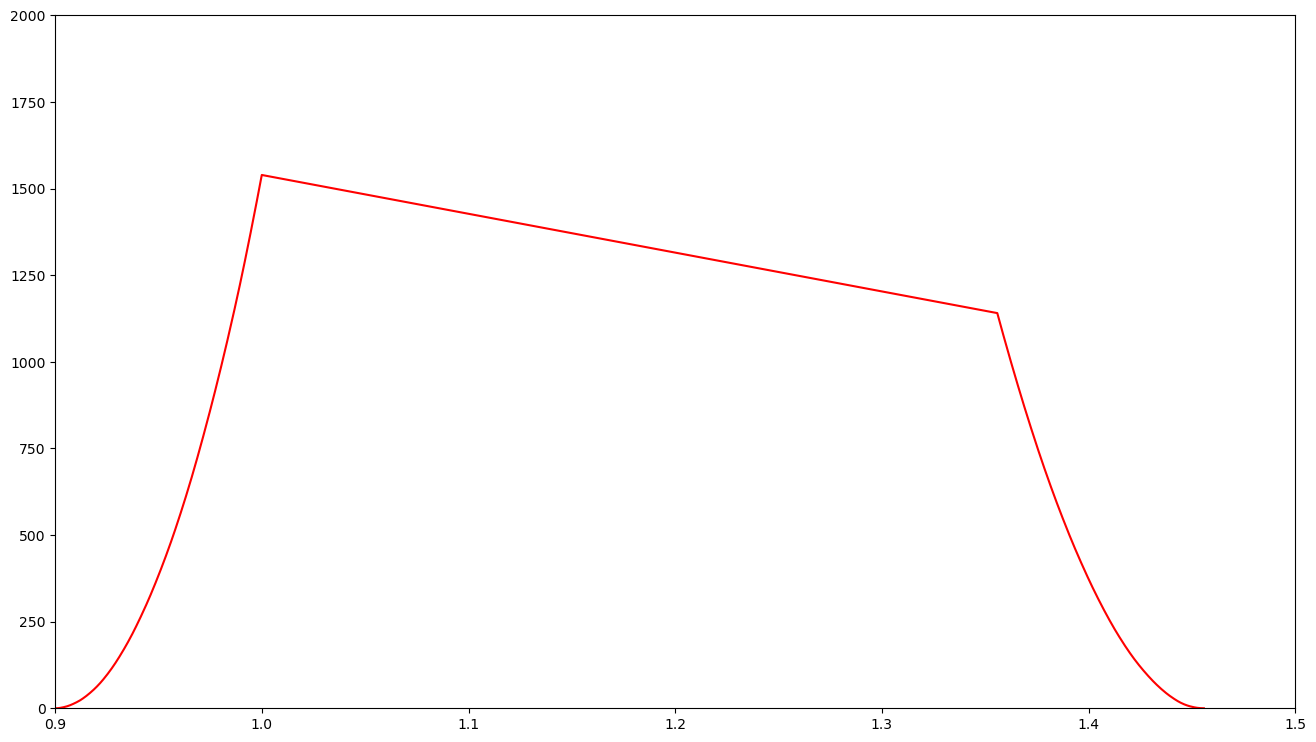

In [30]:
x = list(timepowerdict.keys())
y = list(timepowerdict.values())

plt.figure(figsize=(16, 9))
plt.plot(x,y,color='red')
plt.ylim(0,2000)
plt.xlim(0.9,1.5)
plt.show()

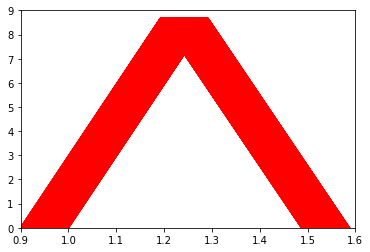

In [301]:


x_values = [float(z) * 1e-8 for z in objectdict["ZK$"].toggle.keys()]

fig, ax = plt.subplots()

for value in objectdict["ZK$"].toggle:
    if objectdict["ZK$"].toggle[value] == "1":
        x = float(value) * 0.00000001
        ax.plot([x, distancedict["AO32x1_ASAP7_75t_L"][1] + x, distancedict["AO32x1_ASAP7_75t_L"][1] + distancedict["AO32x1_ASAP7_75t_L"][0] + x], [0, ogdict["AO32x1_ASAP7_75t_L"], 0], color='red')


plt.ylim(0,9)
plt.xlim(0.9,1.6)
plt.show()


In [44]:
print(outputlist)

[<__main__.OutputPair object at 0x7fec78d20280>, <__main__.OutputPair object at 0x7fec78d20a00>, <__main__.OutputPair object at 0x7fec78d202b0>, <__main__.OutputPair object at 0x7fec78d20640>, <__main__.OutputPair object at 0x7fec78d20820>, <__main__.OutputPair object at 0x7fec78d20d00>, <__main__.OutputPair object at 0x7fec78d20fd0>, <__main__.OutputPair object at 0x7fec78d20880>, <__main__.OutputPair object at 0x7fec78d20580>, <__main__.OutputPair object at 0x7fec78d20520>, <__main__.OutputPair object at 0x7fec78d204c0>, <__main__.OutputPair object at 0x7fec78d20460>, <__main__.OutputPair object at 0x7fec78d20070>, <__main__.OutputPair object at 0x7fec78d20160>, <__main__.OutputPair object at 0x7fec78d20250>, <__main__.OutputPair object at 0x7fec78d201c0>, <__main__.OutputPair object at 0x7fec78d20f10>, <__main__.OutputPair object at 0x7fec78d200d0>, <__main__.OutputPair object at 0x7fec78d20940>, <__main__.OutputPair object at 0x7fec78d209a0>, <__main__.OutputPair object at 0x7fec78

In [32]:
print(len(objectdict))

39137


In [52]:
radixtocell={}
for x in objectdict:
    for y in outputlist:
        if objectdict[x].name == y.output:
            radixtocell[x]=y.cellname


In [53]:
print(len(radixtocell))##not all wires are output wires

7419


In [54]:
for x in radixtocell:
    print(x)
    print(radixtocell[x])

-c
AO22x2_ASAP7_75t_L
9#!
BUFx8_ASAP7_75t_SL
F7!
BUFx8_ASAP7_75t_SL
b7!
BUFx8_ASAP7_75t_SL
(8!
BUFx8_ASAP7_75t_SL
P9!
BUFx8_ASAP7_75t_SL
Q9!
BUFx8_ASAP7_75t_SL
R9!
BUFx8_ASAP7_75t_SL
X9!
BUFx8_ASAP7_75t_SL
Y9!
BUFx8_ASAP7_75t_SL
[9!
BUFx8_ASAP7_75t_SL
\9!
BUFx8_ASAP7_75t_SL
^9!
BUFx8_ASAP7_75t_SL
_9!
BUFx8_ASAP7_75t_SL
b9!
BUFx8_ASAP7_75t_SL
d9!
BUFx8_ASAP7_75t_SL
e9!
BUFx8_ASAP7_75t_SL
g9!
BUFx8_ASAP7_75t_SL
h9!
BUFx8_ASAP7_75t_SL
j9!
BUFx8_ASAP7_75t_SL
p9!
BUFx8_ASAP7_75t_SL
r9!
BUFx8_ASAP7_75t_SL
s9!
BUFx8_ASAP7_75t_SL
u9!
BUFx8_ASAP7_75t_SL
v9!
BUFx8_ASAP7_75t_SL
x9!
BUFx8_ASAP7_75t_SL
,:!
BUFx8_ASAP7_75t_SL
0:!
BUFx8_ASAP7_75t_SL
u;!
BUFx8_ASAP7_75t_SL
{;!
BUFx8_ASAP7_75t_SL
|;!
BUFx8_ASAP7_75t_SL
};!
BUFx8_ASAP7_75t_SL
~;!
BUFx8_ASAP7_75t_SL
"<!
BUFx8_ASAP7_75t_SL
#<!
BUFx8_ASAP7_75t_SL
;=!
BUFx8_ASAP7_75t_SL
<=!
BUFx8_ASAP7_75t_SL
==!
BUFx8_ASAP7_75t_SL
s@!
NAND2xp67_ASAP7_75t_L
t@!
INVxp67_ASAP7_75t_SL
u@!
NAND2xp67_ASAP7_75t_L
v@!
AO22x2_ASAP7_75t_L
w@!
NAND2xp67_ASAP7_75t_L
x

In [55]:
celltoobj={}
for x in distancedict:
    celltoobj[x]=[]
for x in celltoobj:
    for y in objectdict:
        if y in radixtocell and radixtocell[y] == x:
            celltoobj[x].append(objectdict[y])

In [56]:
print(celltoobj)

{'A2O1A1Ixp33_ASAP7_75t_L': [], 'A2O1A1O1Ixp25_ASAP7_75t_L': [], 'AO211x2_ASAP7_75t_L': [<delayobject.DelayObject object at 0x7febe9de4ac0>, <delayobject.DelayObject object at 0x7febe9de4c40>, <delayobject.DelayObject object at 0x7febe9de4d00>, <delayobject.DelayObject object at 0x7febe9de4dc0>, <delayobject.DelayObject object at 0x7febe9de4e80>, <delayobject.DelayObject object at 0x7febdeaf41c0>, <delayobject.DelayObject object at 0x7febdec91a00>, <delayobject.DelayObject object at 0x7febdedc2580>, <delayobject.DelayObject object at 0x7febdedc2e20>, <delayobject.DelayObject object at 0x7febca8d10a0>, <delayobject.DelayObject object at 0x7febca8d92e0>, <delayobject.DelayObject object at 0x7febca8d9b20>, <delayobject.DelayObject object at 0x7febca8e0460>, <delayobject.DelayObject object at 0x7febcafe6580>, <delayobject.DelayObject object at 0x7febcaffe580>, <delayobject.DelayObject object at 0x7febcaffedc0>, <delayobject.DelayObject object at 0x7fec4af0d0a0>, <delayobject.DelayObject ob

In [57]:
print(celltoobj["AOI31xp67_ASAP7_75t_L"][0].toggle)

{'90000000': '1', '90005107': '0', '90025048': '1', '90045048': '0', '90045103': '1', '90075104': '0', '90085107': '1', '90095048': '0', '90115103': '1', '90135048': '0', '90145048': '1', '90165045': '0', '90175048': '1', '90185104': '0', '90195046': '1', '90205107': '0', '90215103': '1', '90215104': '0', '90225046': '1', '90235104': '0', '90265103': '1', '90265104': '0', '90275107': '1', '90285045': '0', '90285103': '1', '90295107': '0', '90315103': '1', '90345048': '0', '90355103': '1', '90365045': '0', '90365107': '1', '90375048': '0', '90395048': '1', '90395104': '0', '90415107': '1', '90425048': '0', '90455046': '1', '90465048': '0', '90465103': '1', '90465104': '0', '90505048': '1', '90515048': '0', '90525103': '1', '90525104': '0', '90535046': '1', '90545048': '0', '90555103': '1', '90565045': '0', '90575048': '1', '90575104': '0', '90595046': '1', '90615045': '0', '90635046': '1', '90645045': '0', '90655107': '1', '90665048': '0', '90665103': '1', '90665104': '0', '90675046': '

In [58]:
print(len(celltoobj))

200


In [59]:
def g(value, peak, t1, t2, t):
    c = value + t1
    r2 = c + t2
    r1 = value
    m1 = peak / (c - r1)
    m2 = peak / (c - r2)
    
    if t <= c:
        return m1 * (t - r1)
    return m2 * (t - r2)

def plotGraph(distancedict1:str,distancedict2:str,ogdict:float,radix):
    y = []
    peak = ogdict#["AO221x2_ASAP7_75t_L"]
    t1 = distancedict2#["AO221x2_ASAP7_75t_L"][1]
    t2 = distancedict1#["AO221x2_ASAP7_75t_L"][0]

    timepowerdict = {}
    newdict= {float(key) * 1e-8: value for key, value in objectdict[radix].toggle.items()}
    newdict_keys = list(newdict.keys())
    powerx=[]
    for x in newdict_keys:
        powerx.append(x)
        powerx.append(x+t1+t2)
    powerx.sort()
    for value in newdict_keys:
        if newdict[value] == "1":
            for t in powerx:
                power = g(value, peak, t1, t2, t)
                if power >= 0:
                    if t not in timepowerdict:
                        timepowerdict[t] = []
                    timepowerdict[t].append(power)
    for x in list(timepowerdict.keys()):
        timepowerdict[x] = sum(timepowerdict[x])
    return timepowerdict

In [60]:
import numpy as np
import pandas as pd

In [62]:
import matplotlib.pyplot as plt

dataset=[]
for x in celltoobj:
    for y in celltoobj[x]:
        dic = plotGraph(distancedict[x][0], distancedict[x][1], ogdict[x], y.radix)
        x_value = list(dic.keys())
        y_value = list(dic.values())
        dataset.append([x_value,y_value])
        #plt.xlabel("Time")
        #plt.ylabel("Power")
        #plt.title(x+" instance "+y.radix)
        #plt.plot(x_value,y_value,color='red')
        #plt.show()


In [68]:
print(dataset[0][1])

[0.0, 1.671674294423764e-05, 0.04171384587688978, 0.04176956835334995, 0.04256918589052711, 0.08355863957345015, 0.16621875421399163, 0.16707130810382295, 0.2229108017629175, 0.2233496162650684, 0.22431082898393673, 0.30485209645716616, 0.3059386847480931, 0.30605570194870274, 0.40362854435143736, 0.5139924812252779, 0.5142822381029574, 0.6395575096770106, 0.6403223006664891, 0.640489468095777, 0.6413949583382933, 0.6419925818982519, 1.865128801402013, 1.865680453918941, 2.0322460805490064, 2.032354739378043, 2.7564028470473017, 2.756636881448521, 2.952348149390072, 2.9527242761062005, 3.1623104406858706, 3.162600197563427, 3.385646126331801, 3.3857645365943454, 3.386119767381713, 3.633184869627639, 4.388271789746187, 4.3887746850964025, 4.389092303212048, 4.666590235975657, 4.943948862548346, 4.945704120556841, 4.946493986660389, 5.247451082013263, 5.252998254544687, 5.567186651932536, 7.169143769268308, 7.170782010076256, 7.172186216483014, 7.172708614699731, 7.174310635898232, 7.533

In [63]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# define the standalone discriminator model


2023-08-07 19:02:53.871994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-08-07 00:21:19.351958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 1ms/step


KeyboardInterrupt: 

In [74]:
dataset_copy=dataset
for x in dataset_copy:
    if len(x[0])<20 and len(x[1])<20:
        dataset_copy.remove(x)

In [77]:
for x in dataset_copy:
    for y in x:
        if len(y)<20:
            dataset_copy.remove(x)
            break

In [82]:
print(len(dataset_copy))
for x in dataset_copy:
    for y in x:
        if len(y) < 20:
            dataset_copy.remove(x)
            break
print(len(dataset_copy))

6758
6737


In [83]:
for x in dataset_copy:
    for y in x:
        print(len(y))

2511
2511
3058
3058
2464
2464
2495
2495
2551
2551
656
656
1512
1512
272
272
208
208
1128
1128
3043
3043
3874
3874
3108
3108
1714
1714
1008
1008
2038
2038
936
936
44
44
1676
1676
2299
2299
983
983
1534
1534
1106
1106
2152
2152
1059
1059
1736
1736
86
86
1554
1554
982
982
1664
1664
1756
1756
1519
1519
1724
1724
2218
2218
1208
1208
1864
1864
2182
2182
1694
1694
1042
1042
1724
1724
1360
1360
1559
1559
1378
1378
1707
1707
1655
1655
1443
1443
1287
1287
1762
1762
1228
1228
1682
1682
1524
1524
2167
2167
1699
1699
2315
2315
2204
2204
2262
2262
2290
2290
2307
2307
2279
2279
2315
2315
2275
2275
2292
2292
2306
2306
2336
2336
2355
2355
947
947
1520
1520
1522
1522
118
118
118
118
1088
1088
1111
1111
1175
1175
1107
1107
1079
1079
1094
1094
1138
1138
1099
1099
1095
1095
1136
1136
1088
1088
1115
1115
1058
1058
1098
1098
1119
1119
1095
1095
1091
1091
1136
1136
1068
1068
1116
1116
1083
1083
1063
1063
1140
1140
1108
1108
1144
1144
1118
1118
1100
1100
1106
1106
1099
1099
1151
1151
1172
1172
1178
1178
1131
1

In [152]:
print(dataset[1][1])

[0.0, 0.03503690013523775, 0.03505083075434506, 0.035198495316959864, 0.03524307329813419, 0.1182960313977339, 0.16007953037019124, 0.16069247761122216, 0.2166824219567685, 0.28600118267124125, 0.2861126276241771, 0.3684091531058555, 0.3695375332541508, 0.46744192439185595, 0.5630352258184134, 0.6750596924906495, 0.7870953036583569, 0.9131604413362817, 0.913762244081996, 1.1902014497929843, 1.3294797797011753, 1.6359840475853036, 1.6382979234203037, 1.8032921762141367, 1.803643227815734, 1.804838474935744, 1.8051282318133768, 2.0008785054886444, 2.001015025555788, 2.2058369183984374, 2.2074668008349208, 2.208024025599337, 2.2088041402699647, 2.443540644599349, 2.4438011471767878, 2.445731930986035, 2.6937248124649265, 3.225999838216164, 3.4882200609967504, 3.491173352249047, 3.76635880223976, 4.062119776662624, 4.062500082564416, 4.365265372278269, 4.673026182006558, 4.992853694012248, 4.995448968353184, 5.326273311087846, 5.330318762878652, 5.33087598764333, 5.674300575367038, 5.67839

2511
2511
3058
3058
2464
2464
2495
2495
2551
2551
656
656
1512
1512
272
272
208
208
1128
1128
3043
3043
3874
3874
3108
3108
1714
1714
1008
1008
2038
2038
936
936
44
44
1676
1676
2299
2299
983
983
1534
1534
1106
1106
2152
2152
1059
1059
1736
1736
86
86
1554
1554
982
982
1664
1664
1756
1756
1519
1519
1724
1724
2218
2218
1208
1208
1864
1864
2182
2182
1694
1694
1042
1042
1724
1724
1360
1360
1559
1559
1378
1378
1707
1707
1655
1655
1443
1443
1287
1287
1762
1762
1228
1228
1682
1682
1524
1524
2167
2167
1699
1699
2315
2315
2204
2204
2262
2262
2290
2290
2307
2307
2279
2279
2315
2315
2275
2275
2292
2292
2306
2306
2336
2336
2355
2355
947
947
1520
1520
1522
1522
118
118
118
118
1088
1088
1111
1111
1175
1175
1107
1107
1079
1079
1094
1094
1138
1138
1099
1099
1095
1095
1136
1136
1088
1088
1115
1115
1058
1058
1098
1098
1119
1119
1095
1095
1091
1091
1136
1136
1068
1068
1116
1116
1083
1083
1063
1063
1140
1140
1108
1108
1144
1144
1118
1118
1100
1100
1106
1106
1099
1099
1151
1151
1172
1172
1178
1178
1131
1

In [192]:
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from tensorflow.keras.layers import Activation

def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    # Use 'softplus' activation to map output to the range (0, +∞)
    model.add(Dense(n_outputs, activation=Activation('softplus')))
    return model


# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def generate_real_samples(epoc):
    X1 = np.array(dataset[epoc][0])
    X2 = np.array(dataset[epoc][1])
    # Combine the two arrays into a single array with shape (n, 2)
    X = np.column_stack((X1, X2))
    # Generate class labels
    y = np.ones((X.shape[0], 1))
    return X, y


# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

def generate_fake_samples(generator, latent_dim, n, target_range=(0.9, 1.8)):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    # Scale the generated samples from (0, +∞) to (0.9, 1.8)
    X[:,0]=X[:,0]*(target_range[1] - target_range[0]) + target_range[0]
    y = np.zeros((n, 1))
    return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim):
    # prepare real samples
    x_real, y_real = generate_real_samples(epoch)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, len(dataset[epoch][0]))
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()

In [193]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)

In [197]:
# train the generator and discriminator
# manually enumerate epochs
for i in range(len(dataset)):
    # prepare real samples
    x_real, y_real = generate_real_samples(i)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, len(dataset[i]))
    # update discriminator
    discriminator.train_on_batch(x_real, y_real)
    discriminator.train_on_batch(x_fake, y_fake)
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, len(dataset[i]))
    # create inverted labels for the fake samples
    y_gan = ones((len(dataset[i]), 1))
    # update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)
    # evaluate the model every n_eval epochs
    if (i + 1) % 200 == 0:
        summarize_performance(i, generator, discriminator, latent_dim)


[[ 0.82511068 -0.7310868   0.16881043  0.36664525 -0.15992283]
 [ 0.5424108  -0.33225801  0.95671809  0.53206558  0.02519581]]
1/1 [==============================] - 0s 23ms/step
[[-1.30369821  0.1485665   1.82996499 -0.35825674  0.19619569]
 [-0.00643025 -1.0771308   0.923019    0.56726348 -0.06421991]]
[[ 1.20140096 -0.29015333 -1.87520366  0.64963243  1.96771477]
 [-0.17015482 -0.49523379  0.82164557 -0.12433112  2.195699  ]]
1/1 [==============================] - 0s 17ms/step
[[ 9.43763578e-04  1.03426652e+00 -6.06222307e-01 -3.15153234e-01
   6.00697556e-01]
 [ 2.38393822e+00 -1.14534822e+00 -6.70052213e-01  5.35097799e-01
   2.18007067e-01]]
[[ 0.16402886  1.37205294  0.29379584 -0.5664189  -0.9380197 ]
 [ 0.39193418 -0.09356623 -1.12942315 -1.24991151 -0.24776239]]
1/1 [==============================] - 0s 26ms/step
[[-1.26439016 -0.2114865  -0.21839527  1.74276072 -0.75796818]
 [ 0.13254295  0.47583827  0.00842092  0.99330251 -1.36398022]]
[[-0.79296539  0.62422559  0.7249946  

1/1 [==============================] - 0s 18ms/step


KeyboardInterrupt: 

In [191]:
xi,yi = generate_fake_samples(generator, 5, 10, target_range=(0.9, 1.8))
print(xi)

[[ 1.58144374  0.64032735  0.37083678  0.8112904   1.17669188]
 [ 0.22919279 -1.29429703  2.11942742 -0.82048951 -0.16487584]
 [-0.09897697  0.05216464 -1.76468434  0.36798618 -0.61919742]
 [-0.07631053  0.50299105  0.55871427  2.29674637 -0.41478907]
 [-1.82656017 -0.76833898  0.0428787  -0.15176504  1.17887449]
 [ 1.89931538  2.22987881  0.22146128 -0.6203513  -0.41583372]
 [-0.43701996  0.27756594 -1.41263108 -0.19099424 -0.53490337]
 [-0.06314727 -0.21344552  0.17702491 -0.88013598 -0.18716464]
 [ 0.54672055  1.13416827 -1.21561818  2.15487424  0.16405571]
 [ 0.16082355 -0.25081976  0.78825707  0.22695677  0.14007687]]
1/1 [==============================] - 0s 41ms/step
[[2.0529811  1.5312526 ]
 [1.0364108  2.0474517 ]
 [1.0443673  1.8266654 ]
 [1.3530359  1.4969106 ]
 [1.3398688  1.7382321 ]
 [1.4225835  1.1219256 ]
 [1.1161267  1.1700058 ]
 [1.1896905  1.01652   ]
 [1.3144684  1.6237657 ]
 [1.4267455  0.98598063]]
